<a href="https://colab.research.google.com/github/tanmay-tilwani/capstone-project-1-playstore-anaylysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Play Store App Review Analysis



##### **Project Type**    - EDA (Exploratory Data Analysis)
##### **Contribution**    - Team
##### **Team Member 1 -**  Tanmay Tilwani
##### **Team Member 2 -**  Soni Verma
##### **Team Member 3 -**  Umesh Makkar

# **Project Details -**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights an be drawn for developers to work on and capture the Android market. Each app(row) has values for category, ratin, size, and more. Another dataset contains customer reviews of teh android apps. Explore and analyse the data to discover key factors responsible for app engagement and success.

# **GitHub Link -**

https://github.com/tanmay-tilwani/capstone-project-1-playstore-anaylysis

bold text# **Problem Summary**


"Many businesses and developers face challenges in understanding user sentiments, feedback, and preferences from the vast amount of reviews posted on the Google Play Store for their mobile applications. Extracting meaningful insights from these reviews manually is time-consuming and often lacks accuracy. As a result, there is a need to develop an automated solution using natural language processing (NLP) and sentiment analysis techniques to efficiently analyze app reviews. The objective is to gain actionable insights that can help improve app quality, enhance user satisfaction, prioritize feature development, and make data-driven decisions to boost user acquisition and retention. The solution should provide an efficient, scalable, and accurate means of processing and categorizing large volumes of reviews to aid in brand reputation management, competitive analysis, and product roadmap planning."

#### **Define Your Business Objective?**

The business objective of conducting Play Store app review analysis is to gain valuable insights and feedback from users who have used or are currently using a particular app. By analyzing the reviews and feedback left by users, businesses can achieve several goals:

1 Improve App Quality: App reviews often contain feedback about bugs, crashes, and other issues. Analyzing these reviews can help developers identify problems and make improvements to enhance the overall app quality.

2 User Satisfaction: Understanding user sentiments and preferences expressed in reviews can help businesses gauge user satisfaction levels. Positive reviews can highlight features users love, while negative reviews can shed light on areas that need improvement.

3 Feature Prioritization: Analyzing reviews can help businesses identify popular features and functionalities that users appreciate the most. This data can be used to prioritize future development efforts.

4 Competitive Analysis: Comparing app reviews with those of competitors can offer valuable insights into strengths and weaknesses. This can help businesses identify opportunities to differentiate themselves and improve their market position.

5 User Acquisition and Retention: Positive reviews and high ratings can attract more users to download the app, improving user acquisition. Additionally, addressing negative reviews and resolving user issues can lead to higher user retention rates.

# ***Introduction of Data***

Mobile applications are widely available. They are simple to make and may be profitable. These two reasons have led to an increase in the number of apps being created. In this notebook, we'll compare more than 10,000 Google Play apps from various categories to conduct a thorough analysis of the Android app industry. In order to develop strategies to promote growth and retention, we will search the data for insights.

Let's examine the data, which consists of the following two files:

datasets/play_store_data.csv

This file contains all the details of the apps on Google Play. There are 13 features that describe a given app.

*   **App**: Name of the app
*   **Category**: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
*   **Rating**: The current average rating (out of 5) of the app on Google Play
*   **Reviews**: Number of user reviews given on the app
*   **Size**: Size of the app in MB (megabytes)
*   **Installs**: Number of times the app was downloaded from Google Play
*   **Type**: Whether the app is paid or free
*   **Price**: Price of the app in US$
*   **Content Rating**: A content rating (also known as maturity rating) rates the suitability of TV broadcasts, movies, comic books, or video games to its audience.To show which age group is suitable to view media and entertainment.
*   **Genres**: A category of artistic, musical, or literary composition characterized by a particular style, form, or content
*   **Last Updated**: Date on which the app was last updated on Google Play
*   **Current Ver**: Current Version means a version of the software that is currently being supported by its publisher.
*   **Android Ver**: Android versions (codenames) are used to describe the various updates for the open source Android mobile operating system.

datasets/user_reviews.csv

This document showcases a selection of the top 100 first-user evaluations for each app. Each category's distribution of favorable and unfavorable reviews has been pre-processed and run through a sentiment analyzer.

* **App**: Name of the app on which the user review was provided. Matches the App column of the play_store_data.csv file
* **Translated Review**: The pre-processed user review text.
* **Sentiment**: Sentiment category of the user review - Positive, Negative or Neutral.
* **Sentiment Polarity**: Sentiment score of the user review.



# Import Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Dataset Loading

In [5]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Read the data
playstore_data = "/content/Play Store Data.csv"
user_data = "/content/User Reviews.csv"

playstoredf = pd.read_csv(playstore_data)
userdf = pd.read_csv(user_data)



### Datasets First View

In [7]:
playstoredf.head() #Display the first 5 row of the Playstoredf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
#Display the first 5 row of the userdf
userdf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Explore the Both Datasets

In [9]:
#Play Store App Data
print("Total number of row and columns in the dataset", playstoredf.shape)
print("Total number of Unique apps in the dataset:", playstoredf['App'].nunique())

Total number of row and columns in the dataset (10841, 13)
Total number of Unique apps in the dataset: 9660


In [10]:
#user reviews Data
print("Total of row and columns in User review data", userdf.shape)
print("Total number of unique apps in the dataset", userdf['App'].nunique())

Total of row and columns in User review data (64295, 5)
Total number of unique apps in the dataset 1074


In [11]:
# Summary of the playstore Dataset
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
#summary of user review data
userdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Data Cleaning/Manipulation/Data Wrangling

---

##Playstore Data

## 1. Check the Null values in dataset

The first step is to find the Missing/Null Values in the Playstore dataset.

In [13]:
playstoredf.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
playstoredf.sort_values(by = 'Rating', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0M,"10,000+",Free,0,Everyone,Entertainment,"June 26, 2017",1.0.9,4.0 and up
10166,FA Player Essentials,SPORTS,5.0,7,68M,100+,Free,0,Everyone,Sports,"July 23, 2018",1.6.0,4.0.3 and up
7895,Dine In CT - Food Delivery,SHOPPING,5.0,4,1.6M,"1,000+",Free,0,Everyone,Shopping,"May 16, 2016",1.3,4.0 and up
5118,Eternal Light AG,SOCIAL,5.0,30,13M,100+,Free,0,Teen,Social,"May 19, 2018",1.04,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [15]:
#Drop the null Values
playstoredf.dropna(subset =['Rating'], inplace = True)


In [16]:
#Fill the Columns which has <.05 Null values using most comman value of mode
playstoredf['Current Ver'] = playstoredf['Current Ver'].fillna(playstoredf['Current Ver'].mode()[0])
playstoredf['Android Ver'] = playstoredf['Android Ver'].fillna(playstoredf['Android Ver'].mode()[0])
playstoredf['Content Rating'] = playstoredf['Content Rating'].fillna(playstoredf['Content Rating'].mode()[0])

In [17]:
playstoredf.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

### 2. Check Duplicates

In [18]:
## Drop the duplicates in the "App" column
playstoredf.drop_duplicates(subset='App', inplace=True)
print(playstoredf.shape)

(8197, 13)


### 3. Check the outliers

In [19]:
playstoredf['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [20]:
playstoredf[playstoredf['Rating']==19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [21]:
## Drop the row that has incorrect values
playstoredf.drop([10472], inplace = True)


### 4. Updating the Datatype for following columns for EDA

Installs

In [22]:
playstoredf['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [23]:
#Let's remove some , + from Installs for easy analysis
playstoredf['Installs'] = playstoredf['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x) #remove '+' to ''
playstoredf['Installs'] = playstoredf['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x) #remove ',' to ''
playstoredf['Installs'] = playstoredf['Installs'].apply(lambda x:int(x)) #it will convert data type into int64

In [24]:
playstoredf['Installs'].dtype

dtype('int64')

Size
  

In [25]:
playstoredf['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [26]:
#Remove these Characters ('Varies with device',',','+','k') from the Size Columns
playstoredf['Size'] = playstoredf['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstoredf['Size'] = playstoredf['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
playstoredf['Size'] = playstoredf['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
playstoredf['Size'] = playstoredf['Size'].apply(lambda x:float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x) #convert KB to MB

In [27]:
playstoredf['Size'].dtype

dtype('O')

Price & Reviews

In [28]:
playstoredf['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [29]:
#let's remove $ sign from the Price column
playstoredf['Price'] = playstoredf['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)

In [30]:
# Convert the column types to numeric datatype
playstoredf['Size'] = playstoredf['Size'].apply(lambda x: float(x))
playstoredf['Installs'] = playstoredf['Installs'].apply(lambda x: float(x))
playstoredf['Price'] = playstoredf['Price'].apply(lambda x: float(x))
playstoredf['Reviews'] = playstoredf['Reviews'].apply(lambda x: int(x))

In [31]:
playstoredf.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
playstoredf.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8196,8196,8196.000000,8.196000e+03,7027.000000,8.196000e+03,8196,8196.000000,8196,8196,8196,8196,8196
unique,8196,33,NaN,NaN,NaN,NaN,2,NaN,6,114,1300,2624,31
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1608,NaN,NaN,NaN,NaN,7592,NaN,6618,717,245,1015,1813
mean,NaN,NaN,4.173243,2.552515e+05,21.754060,9.165090e+06,NaN,1.037884,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.536625,1.985594e+06,22.726844,5.825087e+07,NaN,16.857882,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000e+00,0.008301,1.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,1.260000e+02,4.900000,1.000000e+04,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,3.004000e+03,13.000000,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,4.381300e+04,31.000000,1.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


###Identifying the Statistics from the Dataset

In [33]:
# finding numerical data

numeric_data = playstoredf.select_dtypes(include=np.number)
numeric_col = numeric_data.columns


# we will store the numeric features in a variable

print("Numeric Features:", numeric_data.shape)
numeric_data.describe(include='all').T

Numeric Features: (8196, 5)


,count,mean,std,min,25%,50%,75%,max
Rating,8196.0,4.173243e+00,5.366247e-01,1.000000,4.0,4.3,4.5,5.000000e+00
Reviews,8196.0,2.552515e+05,1.985594e+06,1.000000,126.0,3004.0,43813.0,7.815831e+07
Size,7027.0,2.175406e+01,2.272684e+01,0.008301,4.9,13.0,31.0,1.000000e+02
Installs,8196.0,9.165090e+06,5.825087e+07,1.000000,10000.0,100000.0,1000000.0,1.000000e+09
Price,8196.0,1.037884e+00,1.685788e+01,0.000000,0.0,0.0,0.0,4.000000e+02


In [34]:
# Finding the Categorical data

cat_data = playstoredf.select_dtypes(exclude=np.number) #selects data with non-numeric features
cat_col = cat_data.columns

# non-numeric features in a variable

print("Non-Numeric Features:", cat_data.shape)
cat_data.describe(include='all').T

Non-Numeric Features: (8196, 8)


,count,unique,top,freq
App,8196,8196,Photo Editor & Candy Camera & Grid & ScrapBook,1
Category,8196,33,FAMILY,1608
Type,8196,2,Free,7592
Content Rating,8196,6,Everyone,6618
Genres,8196,114,Tools,717
Last Updated,8196,1300,"August 3, 2018",245
Current Ver,8196,2624,Varies with device,1015
Android Ver,8196,31,4.1 and up,1813


In [35]:
playstoredf.to_csv('/content/drive/MyDrive/My_new_numpy.csv') #saved clean playstore data

### What all manipulations have you done and insights you found?

In the Playstore dataset, our first step involves reading the data. Following that, we identify and address any null values present in the dataset. Specifically, we remove null values from the Rating column and replace them with the most common value, which is the mode, for the remaining columns. Subsequently, we eliminate duplicate entries based on the 'APP' column.

Continuing the data cleaning process, we examine and handle potential outliers in the 'Rating' column, opting to remove them. Additionally, we proceed to replace any special characters found in the 'Installs', 'Price', and 'Size' columns. Furthermore, we convert the 'Size' metric from kilobytes (KB) to megabytes (MB) and verify the data types.

This outlines the steps taken to clean the data effectively.

####Let's do some insights

1. How many Unique Category in Playstore Data ?

In [36]:
playstoredf['Category'].nunique()

33

2. Which Category Getting the Highest Average Rating ?

In [37]:
playstoredf.groupby('Category')['Rating'].mean().sort_values(ascending = False).head()

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
Name: Rating, dtype: float64

3. Find Total Number of Apps 5 Star Rating ?

In [38]:
len(playstoredf[playstoredf['Rating']==5.0])

271

4. Find Average Value of Reviews ?

In [39]:
playstoredf['Reviews'] = playstoredf['Reviews'].astype(float)
playstoredf['Reviews'].mean()

255251.47071742313

5. Total Number of Free and Paid Apps ?

In [40]:
playstoredf['Type'].value_counts()

Free    7592
Paid     604
Name: Type, dtype: int64

6. Display Top 5 Apps having Highest Reviews ?

In [41]:
top_5= playstoredf.nlargest(5, 'Reviews')
print(top_5[['App', 'Reviews']])


                                           App     Reviews
2544                                  Facebook  78158306.0
336                         WhatsApp Messenger  69119316.0
2545                                 Instagram  66577313.0
335   Messenger – Text and Video Chat for Free  56642847.0
1670                            Clash of Clans  44891723.0


7. Average Rating Free and Paid apps ?

In [42]:
playstoredf.groupby('Type')['Rating'].mean()

Type
Free    4.166372
Paid    4.259603
Name: Rating, dtype: float64

 8. is there any difference between the category column and genres?

In [43]:
playstoredf[["Category","Genres"]]

,Category,Genres
0,ART_AND_DESIGN,Art & Design
1,ART_AND_DESIGN,Art & Design;Pretend Play
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
...,...,...
10834,FAMILY,Education
10836,FAMILY,Education
10837,FAMILY,Education
10839,BOOKS_AND_REFERENCE,Books & Reference


There is no differnce between Genres and Category.

##User Review Data

In [44]:
#fist view of the User review data
userdf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [45]:
#total Row and columns in the dataset
userdf.shape

(64295, 5)

In [46]:
#check is there is any null values in the dataset
userdf.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [47]:
#drop the given columns to appropriate analysis
userdf.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=0, inplace=True)

In [48]:
userdf.isnull().any() #again we check if there is any null value or not ?

App                       False
Translated_Review         False
Sentiment                 False
Sentiment_Polarity        False
Sentiment_Subjectivity    False
dtype: bool

In [49]:
userdf.App.value_counts()

Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: App, Length: 865, dtype: int64

Number of the Positivie and Negative sentiment in the APP ?

In [50]:
userdf[(userdf['App']=="10 Best Foods for You") & (userdf['Sentiment']=='Positive')].reset_index()

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...,...
157,194,10 Best Foods for You,Awesome resources I begin new journey. I can't...,Positive,0.712121,0.734848
158,196,10 Best Foods for You,Love app. It gives way good idea I buying stor...,Positive,0.400000,0.400000
159,197,10 Best Foods for You,Great Its really best unique provides detailed...,Positive,0.579167,0.683333
160,198,10 Best Foods for You,Nothing special! Could find anything useful!,Positive,0.410714,0.285714


In [51]:
userdf[(userdf['App']=="10 Best Foods for You") & (userdf['Sentiment']=='Negative')].reset_index()

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
1,43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
2,68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
3,85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
4,95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475
5,132,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
6,143,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
7,168,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
8,185,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
9,195,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


Which comments within the ASUS SuperNote dataset have both a sentiment polarity and sentiment subjectivity score equal to 1?

In [52]:
userdf[(userdf['App']=="ASUS SuperNote") & (userdf['Sentiment_Polarity']==1) & (userdf['Sentiment_Subjectivity']==1)]


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
3391,ASUS SuperNote,Awesome!!!!,Positive,1.0,1.0


Find the netural Sentiment reviews for the app Abs Training-Burn belly fat.

In [53]:
userdf[(userdf['App']=="Abs Training-Burn belly fat") & (userdf['Sentiment']=='Neutral')]


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
3595,Abs Training-Burn belly fat,I would recommend anyone struggling exercise a...,Neutral,0.0,0.0
3597,Abs Training-Burn belly fat,I'm sticking literally kicked booty pain gain,Neutral,0.0,0.0
3602,Abs Training-Burn belly fat,Needs work voice tells take break voice keeps ...,Neutral,0.0,0.0
3611,Abs Training-Burn belly fat,Pop ads middle night!!! Taking phone? F*** app!,Neutral,0.0,0.0
3613,Abs Training-Burn belly fat,I day day I saw difference I went XL medium size,Neutral,0.0,0.0


Identify negative sentiment reviews for Adobe Acrobat Reader, including their associated sentiment polarity and sentiment subjectivity scores.

In [54]:
userdf[(userdf['App'].str.contains("Adobe Acrobat Reader")) & (userdf['Sentiment']=='Negative')]


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
4146,Adobe Acrobat Reader,Not Another Damn Cloud Account! I want another...,Negative,-0.300000,0.700000
4154,Adobe Acrobat Reader,The previous versions good enough.... This upd...,Negative,-0.144444,0.561111
4155,Adobe Acrobat Reader,Hey Pls update app.... I'm face issues... When...,Negative,-0.012500,0.345833
4171,Adobe Acrobat Reader,Forces account password means Google knowledge...,Negative,-0.275000,0.566667
4186,Adobe Acrobat Reader,Not Another Damn Cloud Account! I want another...,Negative,-0.300000,0.700000
4194,Adobe Acrobat Reader,The previous versions good enough.... This upd...,Negative,-0.144444,0.561111
4195,Adobe Acrobat Reader,Hey Pls update app.... I'm face issues... When...,Negative,-0.012500,0.345833
4211,Adobe Acrobat Reader,Forces account password means Google knowledge...,Negative,-0.275000,0.566667
4217,Adobe Acrobat Reader,Forces account password means Google knowledge...,Negative,-0.275000,0.566667
4225,Adobe Acrobat Reader,Not Another Damn Cloud Account! I want another...,Negative,-0.300000,0.700000


In [55]:
userdf.to_csv("/content/drive/MyDrive/My_new_numpy.csv") #saved cleaned file

#Merge Both Datasets

In [56]:
mergedf = pd.merge(playstoredf, userdf, on='App', how = 'inner')
mergedf.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (PIE_CHART)

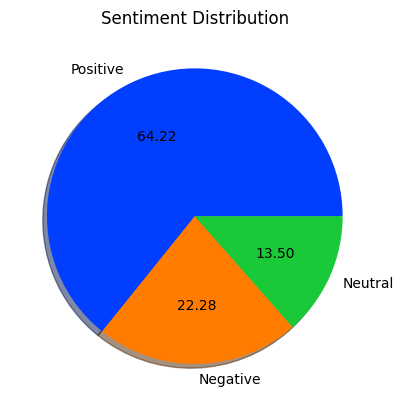

In [57]:
# Count the occurrences of each sentiment value
sentiment_counts = mergedf['Sentiment'].value_counts()

# Create a color palette
palette_color = sns.color_palette('bright')

# Plot a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=palette_color, shadow=True, autopct='%.2f')

# Add a title
plt.title('Sentiment Distribution')

# Display the pie chart
plt.show()

##### 1. Why did you pick the specific chart?

he pie chart was chosen to visualize the distribution of sentiment categories (Positive, Negative, Neutral). Pie charts are useful when you want to represent the parts of a whole and show the relative proportions of different categories.

##### 2. What is/are the insight(s) found from the chart?

Without seeing the chart or the data it represents, I cannot provide specific insights. However, based on a typical sentiment distribution chart:

You can quickly see the proportion of positive, negative, and neutral sentiments in the dataset.
If one sentiment category dominates significantly, it might indicate a strong bias in the dataset towards that sentiment.
The distribution might reveal patterns or imbalances that could be explored further. For instance, a high percentage of negative sentiment might indicate customer dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Insights gained from the chart could help in several ways. If the majority of sentiments are positive, it indicates customer satisfaction, which can lead to positive business impacts like increased customer loyalty, word-of-mouth referrals, and potentially higher sales.

**Negative Impact:** If negative sentiment dominates, this could lead to negative growth. High negative sentiment might indicate customer complaints, product issues, or service problems. Addressing these concerns promptly can prevent customer churn, negative reviews, and loss of business.

**Neutral Sentiment:** A high proportion of neutral sentiment might indicate that customers are generally indifferent, which could potentially lead to stagnation. It might be important to understand why customers are not expressing stronger opinions, whether it's due to a lack of engagement or other reasons

#### Chart - 2 BOX PLOT

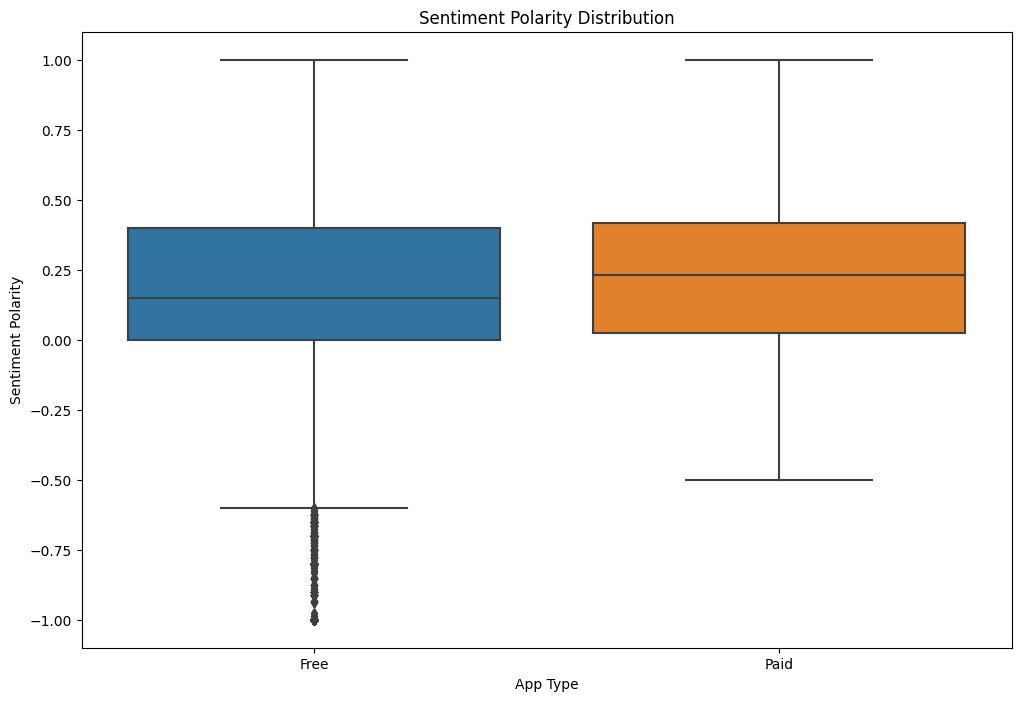

In [58]:
# Create a box plot using seaborn with groupby
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.boxplot(x='Type', y='Sentiment_Polarity', data=mergedf, ax=ax)

# Set title and labels
ax.set_title('Sentiment Polarity Distribution')
ax.set_xlabel('App Type')
ax.set_ylabel('Sentiment Polarity')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

 A box plot (also known as a box-and-whisker plot) is commonly used to visualize the distribution of a dataset. It provides insights into the median, quartiles, and potential outliers. This makes it useful for comparing the distribution of sentiment polarity between different categories (in this case, free and paid apps). It allows for quick comparison of central tendencies and spread of the sentiment polarity values.

##### 2. What is/are the insight(s) found from the chart?

You can easily identify the median sentiment polarity for each app type. If one type consistently has a higher median polarity, it might suggest that users of that type of app tend to express more positive sentiments.

You can observe the spread of sentiment polarity within each category. A larger spread could indicate more varied user opinions.

Outliers, if present, might suggest extreme sentiment expressions that could be valuable for further investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** If the sentiment polarity for paid apps is consistently higher than that for free apps, this could imply that users of paid apps are generally more satisfied or engaged. This might lead to positive business impacts such as increased revenue, user retention, and brand loyalty.

**Negative Impact:** Conversely, if sentiment polarity for paid apps is consistently lower than that for free apps, this might indicate that users are not finding value in the paid offerings, potentially leading to negative growth. Additionally, if either free or paid apps show a wide range of sentiment polarities and a high number of negative outliers, it might indicate widespread dissatisfaction among users, which could lead to negative impacts on user retention and growth.

#### Chart - 3(COUNT-PLOT)

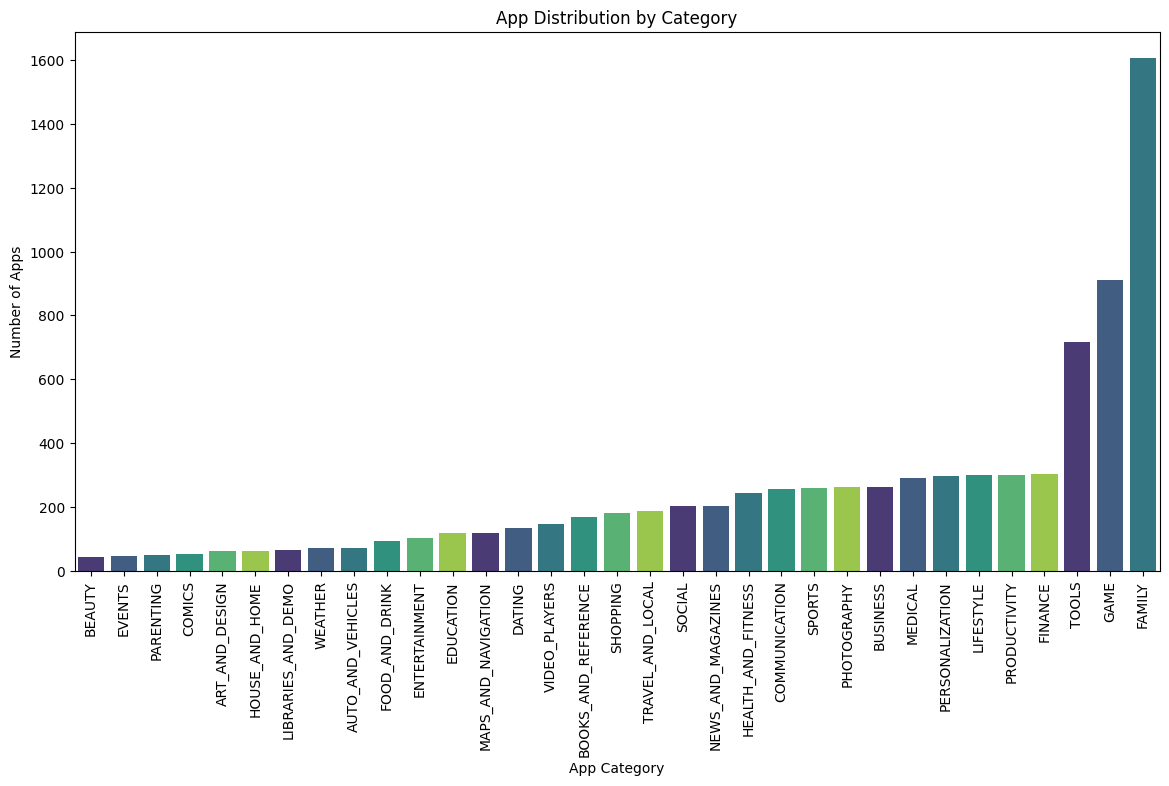

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'playstoredf' with a 'Category' column

# Count the number of apps in each category
app_categories = playstoredf['Category'].value_counts().sort_values()

# Create a color palette
palette_color = sns.color_palette('viridis')

# Create a countplot using seaborn
plt.figure(figsize=(14, 7))
sns.countplot(data=playstoredf, x='Category', order=app_categories.index, palette=palette_color)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('App Category')
plt.ylabel('Number of Apps')
plt.title('App Distribution by Category')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The choice of using a countplot (bar plot) to visualize the distribution of app categories and their corresponding counts is appropriate. Countplots are suitable for displaying the frequency or count of categorical data, making them effective for showing how many apps fall into each category.

##### 2. What is/are the insight(s) found from the chart?

Category Popularity: You can easily identify which categories have the most apps. This information can help businesses understand which types of apps are more prevalent in the market.

Market Saturation: If certain categories are significantly more populated than others, it might indicate a highly competitive market in those categories.

Niche Opportunities: Categories with fewer apps might represent niche markets with less competition. This could be an opportunity for businesses to enter a less crowded space.

Diversity: The chart can reveal the diversity of app offerings across different categories, giving insights into the range of user needs and interests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

If certain categories are very popular and have a large number of apps, this might indicate high user demand. Developing apps in these categories could potentially lead to positive business impact if the apps meet users' needs effectively.
Niche categories might offer growth opportunities with less competition. Developing unique apps in these categories could attract a dedicated user base.

Negative Impact:

Highly saturated categories might lead to increased competition, making it difficult for new apps to gain attention and users. This could potentially lead to negative growth for apps in these categories.
If certain categories have very few apps, it might suggest a lack of demand or interest from users. Developing apps in such categories might not result in positive growth if there's limited user engagement.

#### Chart - 4 (BAR_CHART)

In [60]:
playstoredf['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01,
       5.e+00, 5.e+01, 1.e+00])

<ipython-input-61-d84e7b2e8a3f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  app_category_installs = playstoredf.groupby('Category').sum().sort_values('Installs', ascending=False)


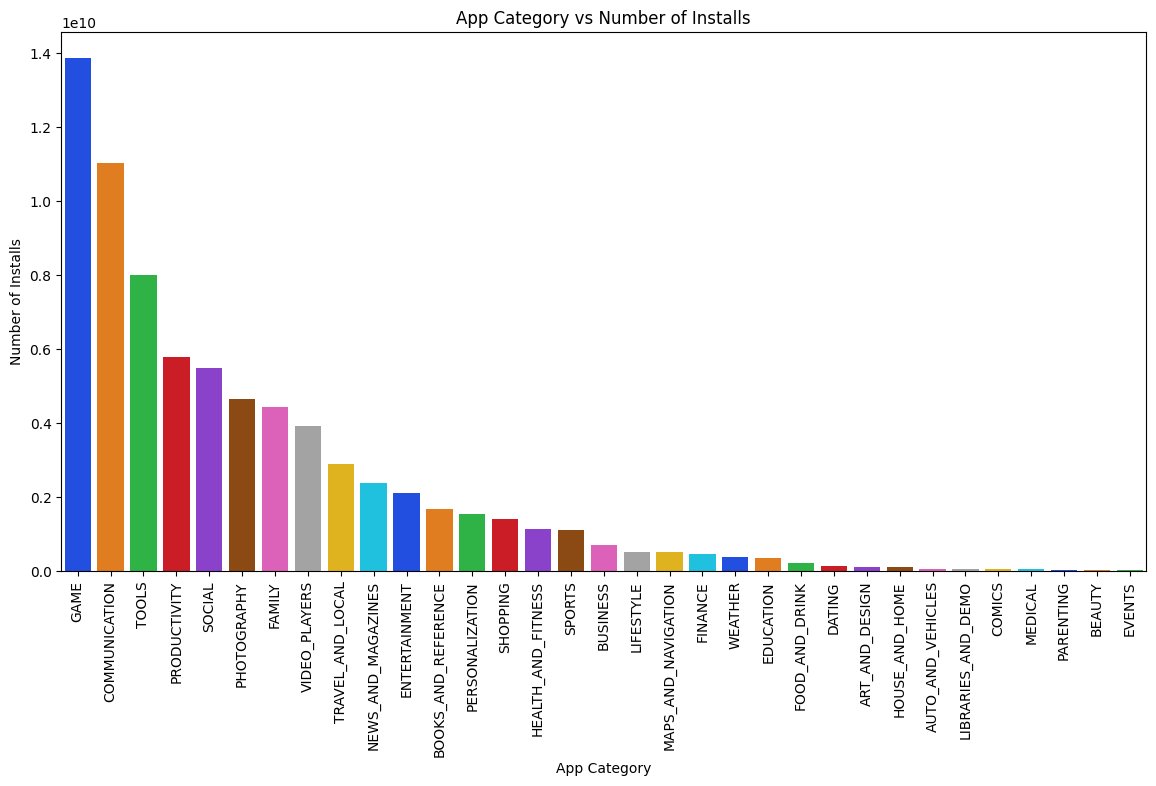

In [61]:
# Group by category and sum the installs
app_category_installs = playstoredf.groupby('Category').sum().sort_values('Installs', ascending=False)

# Create a barplot using seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x=app_category_installs.index, y=app_category_installs['Installs'], palette='bright')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('App Category')
plt.ylabel('Number of Installs')
plt.title('App Category vs Number of Installs')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The choice of using a bar plot (bar chart) is suitable for visualizing the relationship between categorical data (app categories) and their corresponding quantitative values (number of installs). Bar plots are effective for displaying comparisons between different categories.

##### 2. What is/are the insight(s) found from the chart?

Category Popularity: The chart likely shows the number of installs for different app categories. You can easily identify which categories have the highest number of installs. This information helps you understand which app categories are the most popular or widely used among users.

Comparative Analysis: By comparing the heights of the bars, you can quickly determine which categories are performing better in terms of the number of installs. This comparison might reveal which categories have the highest user engagement.

Identifying Trends: If certain categories consistently have high numbers of installs, it might indicate trends in user preferences. On the other hand, categories with lower installs could represent opportunities for growth or improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: If a particular category (such as gaming) has a significantly higher number of installs compared to others, this suggests that it is popular among users. This insight can have a positive business impact, as it indicates a potential market with high user demand.

Gaming Popularity: If the 'Gaming' category has a high number of installs, it indicates that gaming apps are indeed popular. This popularity could lead to various positive impacts, including revenue generation, user engagement, and brand recognition.

Diversification: While the popularity of gaming apps might create positive impacts, it's also essential for businesses to consider diversification. Relying solely on one category might limit growth opportunities. Exploring other popular categories or niche markets could also lead to positive business outcomes.

#### Chart - 5(HISTPLOT)

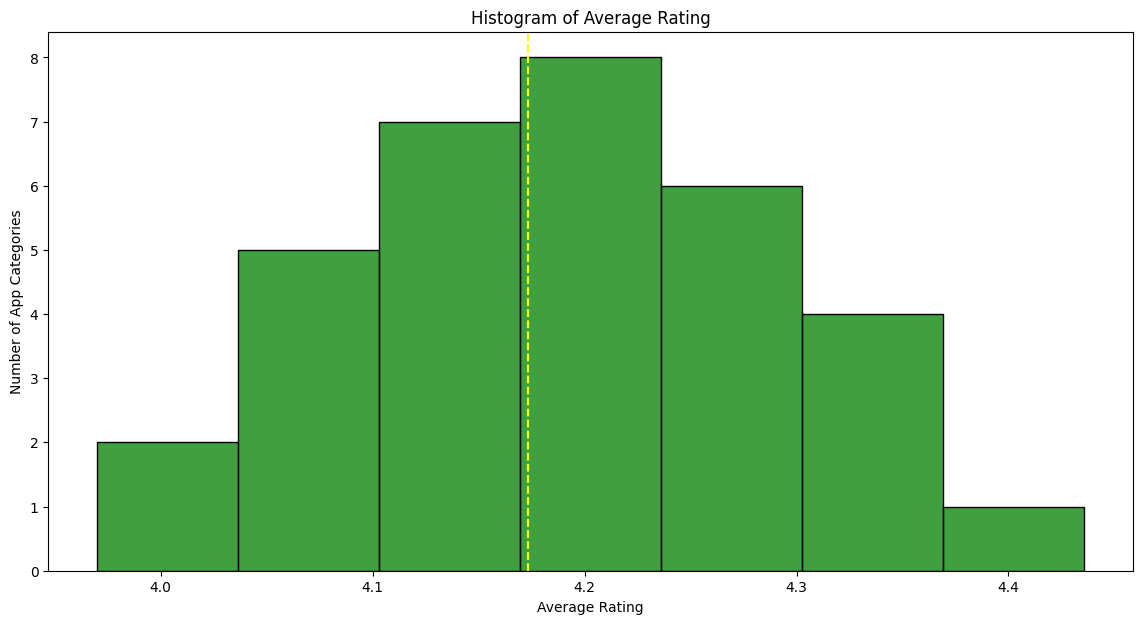

In [62]:
# Calculate the average rating for each category
avg_rating = playstoredf.groupby('Category')['Rating'].mean()

# Create a histogram using seaborn
plt.figure(figsize=(14, 7))
sns.histplot(data=avg_rating, color='green', kde=False)  # Use kde=True for kernel density estimation
plt.axvline(playstoredf['Rating'].mean(), color='yellow', linestyle='--')

# Set labels and title
plt.xlabel('Average Rating')
plt.ylabel('Number of App Categories')
plt.title('Histogram of Average Rating')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The choice of using a histogram is suitable for visualizing the distribution of a continuous variable (average ratings in this case). Histograms help identify patterns, concentrations, and outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

Rating Distribution: You can observe the distribution of average ratings across app categories. This can help you understand whether ratings are concentrated in a specific range or if they are spread out widely.

Central Tendency: The central tendency of the average ratings can be identified, which might indicate the most common rating range.

User Satisfaction: If the histogram is skewed towards higher ratings, it suggests that users are generally satisfied with the apps. If it's skewed towards lower ratings, it might signal user dissatisfaction.

Quality Perception: Businesses can gauge how users perceive the quality of apps in different categories based on the ratings. High ratings may indicate a positive user experience and app quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Insights gained from the histogram can have a positive business impact. High average ratings across categories indicate satisfied users, which can lead to increased user retention, positive reviews, and improved brand reputation.

Negative Impact: If the histogram shows a concentration of low ratings, it might indicate issues with app quality or user experience. This could lead to negative business impacts such as user churn, poor reviews, and potential revenue loss.

#### Chart - 6(JOINT-PLOT)

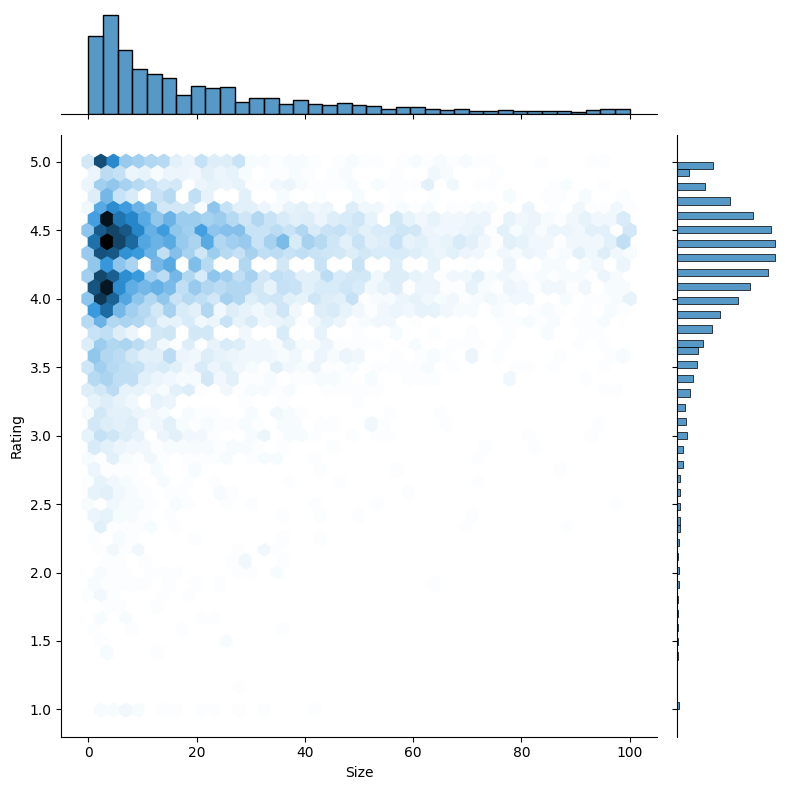

In [63]:
# Create a joint plot using Seaborn
sns.jointplot(x=playstoredf['Size'], y=playstoredf['Rating'], height=8, kind='hex')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

This plot provides insights into the relationship between the size of the apps and their ratings. Hexbin plots are useful when you have a large amount of data and you want to visualize the density of points.

##### 2. What is/are the insight(s) found from the chart?

App Size and Ratings: The hexbin plot helps you see how the distribution of app sizes relates to their ratings. You can observe whether apps with certain sizes tend to receive higher or lower ratings.

Density: The density of points in different areas of the plot indicates where data points are more concentrated. This can show if there's a particular size range that is associated with higher or lower ratings.

Outliers: Outliers or unusual patterns in the hexbins might indicate interesting cases where app size and ratings deviate from the norm.App Size and Ratings: The hexbin plot helps you see how the distribution of app sizes relates to their ratings. You can observe whether apps with certain sizes tend to receive higher or lower ratings.

Density: The density of points in different areas of the plot indicates where data points are more concentrated. This can show if there's a particular size range that is associated with higher or lower ratings.
Outliers: Outliers or unusual patterns in the hexbins might indicate interesting cases where app size and ratings deviate from the norm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimal App Size: Insights from this plot could help businesses determine if there's an optimal size range that tends to result in higher ratings. Developing apps within this size range might lead to better user satisfaction and positive reviews.

User Experience: Understanding how app size relates to ratings can guide decisions about optimizing app performance, download times, and user experience. Smaller and more efficient apps might lead to higher ratings.

Resource Allocation: If larger apps tend to have lower ratings, businesses might prioritize optimizing app size to create a positive impact on user satisfaction.

#### Chart - 7(Scatter-Plot)

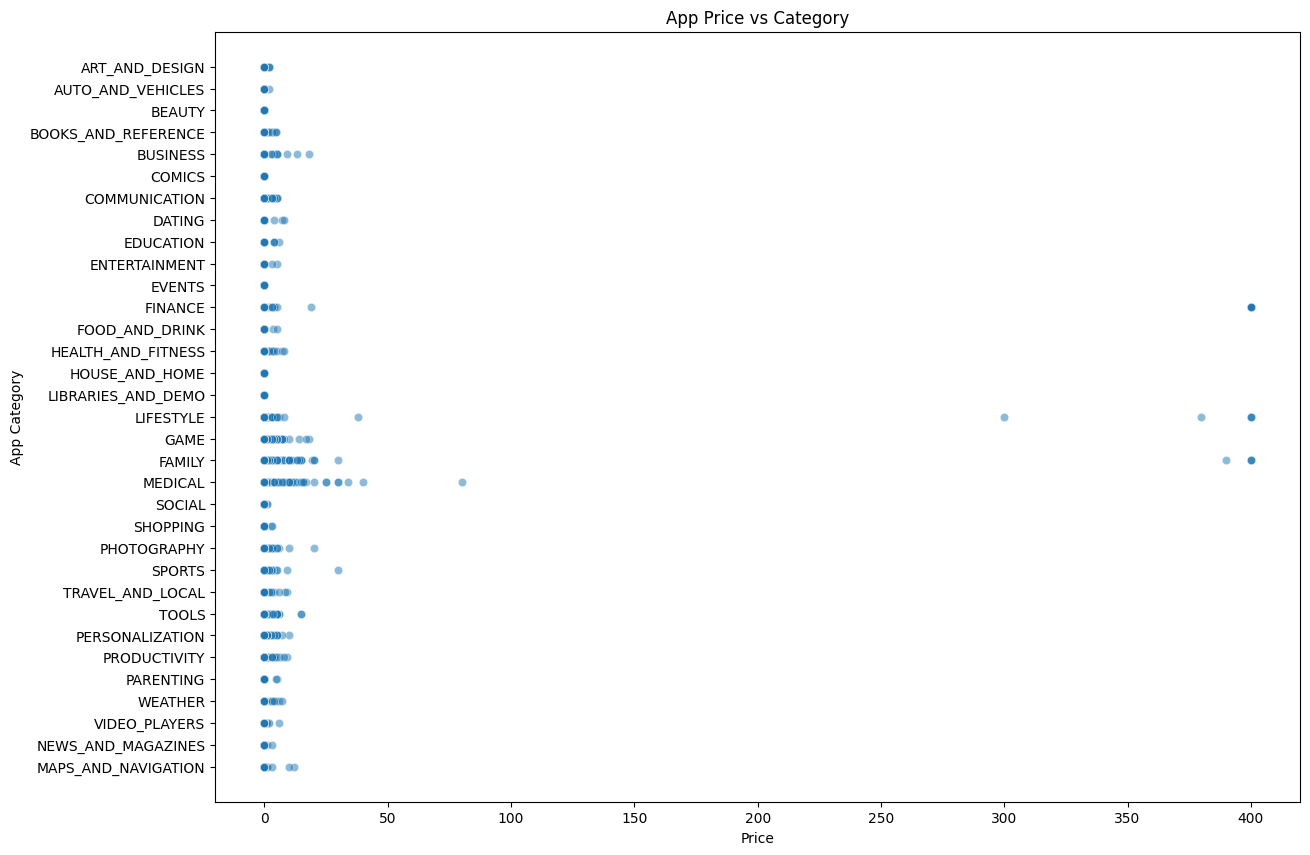

In [64]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(14, 10))
sns.scatterplot(data=playstoredf, x='Price', y='Category', alpha=0.5)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('App Category')
plt.title('App Price vs Category')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The choice of using a scatter plot is suitable for visualizing the relationship between two continuous variables: app prices and categories. Scatter plots help identify patterns, trends, and potential outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

Price Distribution: The scatter plot allows you to observe how app prices are distributed within each category. You can identify whether certain categories tend to have higher or lower prices.

Outliers: Outlying points might indicate apps with unusual pricing within specific categories. These could be premium apps, free apps with in-app purchases, or apps with pricing strategies that deviate from the norm.

Price Comparison: You can compare pricing patterns across different categories and identify any commonalities or differences in pricing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Pricing Strategy: Insights from the scatter plot can inform businesses about effective pricing strategies for different app categories. It might reveal whether users in certain categories are more willing to pay higher prices for apps.

Competitive Analysis: By comparing app prices across categories, businesses can gain insights into how their pricing compares to competitors within each category.

Revenue Optimization: Understanding pricing trends and patterns can help optimize revenue generation. It might lead to adjustments in pricing models, introduction of new pricing tiers, or special offers based on user preferences within specific categories.

Negative Growth Insights:

Overpriced Apps: If the scatter plot shows that most apps within a certain category have high prices and low user engagement (downloads, ratings), it might indicate that the category is overpriced relative to user expectations. This could lead to negative growth as users might avoid purchasing or engaging with such apps.

#### Chart - 8(PIE-CHART)

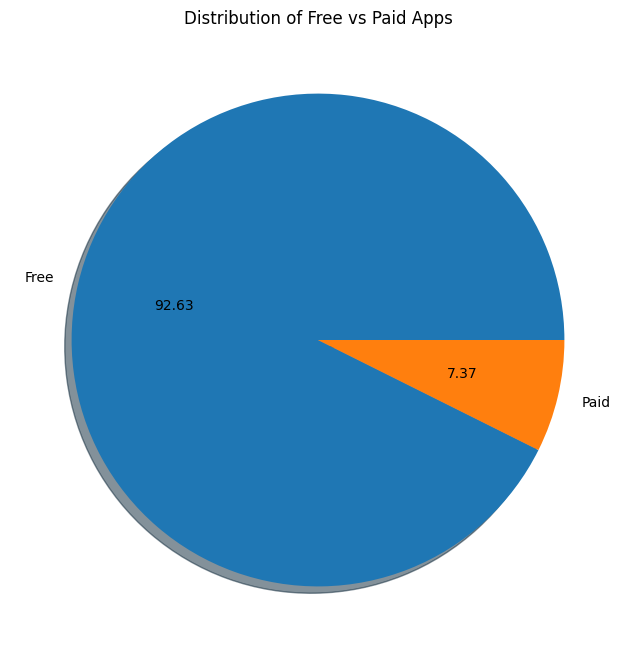

In [65]:
# Group by app type and count the number of apps
freevspaid = playstoredf.groupby('Type').size()

# Create a pie chart using matplotlib
plt.figure(figsize=(12, 8))
plt.pie(freevspaid, labels=['Free', 'Paid'], shadow=True, autopct='%.2f')

# Add a title
plt.title('Distribution of Free vs Paid Apps')

# Show the pie chart
plt.show()

##### 1. Why did you pick the specific chart?

 A pie chart provides a clear visual comparison of the proportions of two categories (free and paid apps) within a whole (total number of apps). This makes it easy to understand the relative distribution at a glance.

##### 2. What is/are the insight(s) found from the chart?

Proportion of Free vs. Paid Apps: The pie chart clearly displays the proportion of free and paid apps in your dataset. You can easily see what percentage of apps are offered for free and what percentage are paid.

User Engagement and Adoption:

Free Apps: If the majority of apps are free, it suggests that your focus might be on user engagement and reaching a wider audience. Free apps could attract more downloads and potentially lead to increased user adoption.
Paid Apps: If a significant portion of apps are paid, it might indicate a focus on monetization strategies. Users who pay for apps might have higher engagement and commitment to the app's functionality.
Monetization Strategy:

Free Apps: A higher proportion of free apps could imply that your business is aiming to generate revenue through alternative means, such as in-app advertisements, microtransactions, or premium features within free apps.
Paid Apps: A larger share of paid apps might indicate a direct revenue model, where users pay upfront for app access. This could lead to higher immediate revenue per download.
User Expectations and Value Perception:

Free Apps: Users typically expect free apps to be available for download. This can lead to wider adoption, but it might also require careful management of user expectations regarding in-app purchases or advertisements.
Paid Apps: Users who pay for apps often have higher expectations of quality, features, and a premium experience. Paid apps need to deliver substantial value to justify the upfront cost.
Market Dynamics and Competition:

Free Apps: A higher proportion of free apps might indicate a strategy to capture a larger user base and compete in a market where free apps dominate.
Paid Apps: A focus on paid apps could suggest targeting a niche market, offering unique features, or competing based on app quality rather than price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The insights gained can help tailor your business strategy. If free apps dominate, you may benefit from higher user engagement, broader brand recognition, and potential revenue from alternative sources. With more paid apps, your business might generate higher immediate revenue per download.

#### Chart - 9(CATPLOT)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 97.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 98.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 98.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 96.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 99.0% of the points cannot be plac

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 95.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


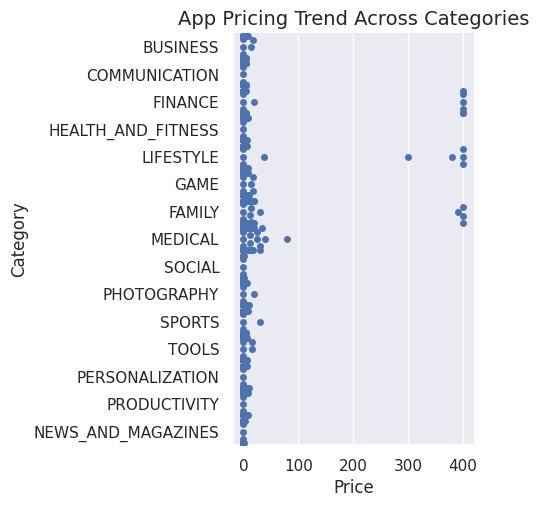

In [66]:
# Select the top categories
top_categories = playstoredf[playstoredf.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                                           'LIFESTYLE', 'BUSINESS', 'PRODUCTIVITY', 'PERSONALIZATION',
                                                           'SPORTS', 'COMMUNICATION', 'HEALTH_AND_FITNESS',
                                                           'NEWS_AND_MAGAZINES', 'SOCIAL'])]

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")

# Create the swarm plot using catplot
lets = sns.catplot(x="Price", y="Category", kind="swarm", data=top_categories)

# Customize the plot
lets.set(xlabel='Price', ylabel='Category')
plt.title('App Pricing Trend Across Categories', size=14)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A categorical scatter plot (swarm plot) is often chosen when you want to visualize the distribution of a numeric variable (such as app prices) within different categories. It's particularly useful when you have discrete categories and want to see how the data points are distributed across these categories. The swarm plot places each data point along the categorical axis, avoiding overlap and providing a clear view of the data density.

##### 2. What is/are the insight(s) found from the chart?

Potential Insights (Hypothetical):
Since I can't see your specific chart, I'll provide hypothetical insights that could be derived from the analysis:

Price Concentration: You might find that most apps in the "Medical" and "Health and Fitness" categories are priced relatively higher compared to other categories. This could suggest that users are willing to pay more for apps related to health and wellness.

Free Dominance: You could observe that the "Social" and "Communication" categories have a larger concentration of free apps compared to other categories. This might indicate that competition is high in these categories, leading to a prevalence of free offerings.

Price Disparity: There might be outliers in categories like "Business" and "Productivity" where some apps are priced significantly higher than others. This could signify specialized or premium offerings in these categories.
Family and Lifestyle: The "Family" and "Lifestyle" categories might show a wide range of prices, suggesting diverse pricing strategies in these categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Pricing Strategy: Businesses could adjust their pricing strategies based on the observed trends in each category. They might choose to align their prices with customer expectations or differentiate themselves through premium pricing.\

Monetization Opportunities: If a certain category (e.g., "Medical") demonstrates a higher willingness to pay, businesses could explore offering additional paid features or versions to increase revenue.

Marketing Focus: Insights on the prevalence of free apps in certain categories could guide marketing efforts. For instance, businesses could emphasize value propositions or unique features to stand out from competitors.

App Development: Understanding pricing trends can influence decisions about which categories to target for new app development or updates. It could also drive innovation in terms of features and pricing models.

#### Chart - 10(PAIR-PLOT)

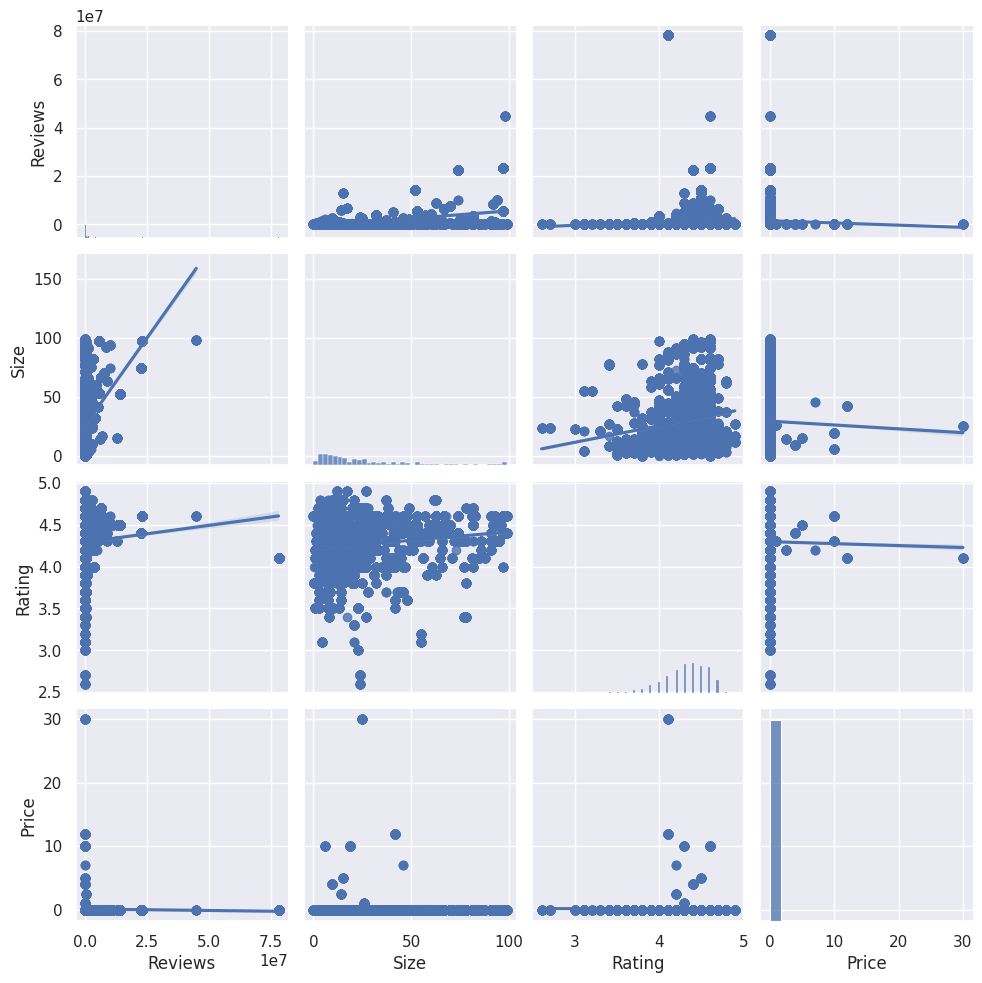

In [67]:
#adding a pair plot for reviews,size,rating,price
sns.pairplot(mergedf, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')

#show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot you've generated is a matrix of scatter plots with regression lines (kind='reg') that allows you to visualize the relationships and correlations between the selected variables: 'Reviews', 'Size', 'Rating', and 'Price'. This is a suitable choice when you want to explore how these numeric variables are interrelated.

##### 2. What is/are the insight(s) found from the chart?

Reviews vs. Rating: You could observe whether apps with higher review counts tend to have higher ratings. A positive correlation between these variables could suggest that popular apps also tend to be well-rated.

Size vs. Price: You might identify whether there's a relationship between the size of an app and its price. Apps with larger sizes might be priced differently compared to smaller apps.

Rating vs. Price: This could reveal whether higher-priced apps tend to have better ratings, or if there's no clear relationship between price and user satisfaction.

Correlations: You'll be able to visually assess the strength and direction of correlations between these variables. For example, a strong positive correlation between 'Reviews' and 'Size' might indicate that larger apps receive more review

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Pricing Strategy: If you observe that higher-priced apps tend to have better ratings, a business might consider adjusting their pricing strategy to reflect perceived value.

Resource Allocation: Understanding the relationship between app size and reviews could guide resource allocation for app development and optimization.
User Experience: Insights about correlations can help prioritize features for user satisfaction. For instance, if 'Size' is correlated with 'Reviews', focusing on optimizing app size could lead to better user engagement.

Marketing Campaigns: The findings could inform targeted marketing strategies. For example, if high-priced apps tend to have high ratings, that could be a selling point in marketing materials.

#### Chart - 11- Correlation Heatmap

<ipython-input-68-cf1702d15b6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = mergedf.corr(), annot = True, cmap = "coolwarm")


<Axes: >

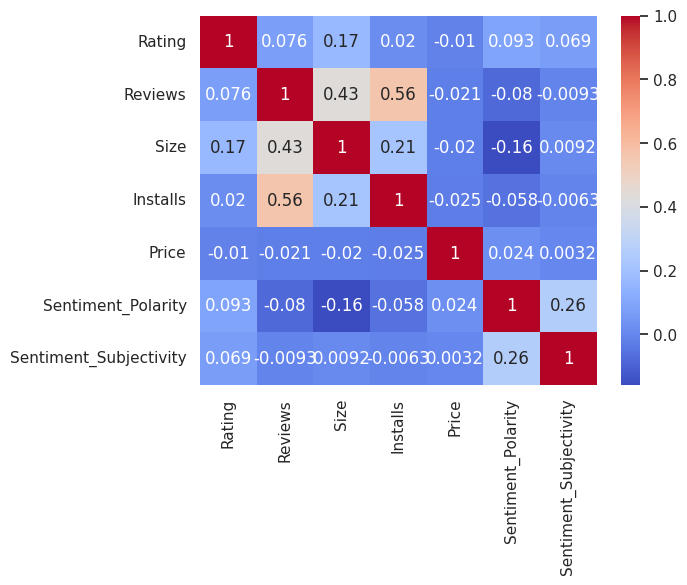

In [68]:
#Heatmap for Merge dataframe
sns.heatmap(data = mergedf.corr(), annot = True, cmap = "coolwarm")

##### 1. Why did you pick the specific chart?

Correlation Overview: The heatmap provides a comprehensive view of the correlation between all pairs of numerical variables in your merged DataFrame. It's an effective way to quickly identify patterns and relationships.

Color Representation: The color-coded representation of correlations makes it easy to spot strong and weak correlations. Warm colors (reds) indicate positive correlations, cool colors (blues) indicate negative correlations, and neutral colors (whites) indicate little to no correlation.

##### 2. What is/are the insight(s) found from the chart?

Variable Relationships: You can identify which pairs of variables are positively correlated, negatively correlated, or not correlated at all. For example, if 'Reviews' and 'Rating' have a strong positive correlation, it suggests that apps with more reviews tend to have higher ratings.

Multicollinearity: High correlations between variables could indicate multicollinearity, where two or more variables are closely related. This might impact the stability and interpretability of regression models.

Feature Selection: The heatmap helps you prioritize variables for further analysis. Highly correlated variables might provide similar information, so you may choose to keep only one of them to simplify your analysis.

Data Validation: Unexpected or counterintuitive correlations might indicate errors in the data or outliers that need further investigation.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To provide meaningful suggestions for analyzing Play Store review data and achieving business objectives, it's essential to understand the specific goals of the client. However, here are some general steps and recommendations that the client could consider:

1. Define Business Objectives:
Clearly define the business objectives related to Play Store review data analysis. Are you aiming to improve app ratings, increase user engagement, optimize pricing, enhance app features, or something else? Identifying clear objectives will guide your analysis.

2. Data Collection and Preprocessing:
Ensure you have access to comprehensive and accurate Play Store review data. Collect data on reviews, ratings, app features, downloads, pricing, and any other relevant metrics. Preprocess the data by handling missing values, duplicates, and outliers.

3. Sentiment Analysis:
Perform sentiment analysis on reviews to gauge user sentiments—positive, negative, or neutral. This analysis can uncover areas where users are satisfied or dissatisfied with the app.

4. Key Metrics Analysis:
Analyze key metrics like average rating, review count, and download count over time. Identify trends, spikes, or dips that could indicate changes in user perception or app performance.

5. Correlation Analysis:
Investigate correlations between different variables such as ratings, reviews, pricing, and features. Identify which factors might be influencing app performance and user satisfaction.

6. Feature Analysis:
Analyze user reviews to identify common feature requests, complaints, or suggestions. Prioritize feature enhancements based on user feedback.

7. Competitor Analysis:
Compare your app's performance with competitors in terms of ratings, reviews, and features. Understand what makes your app unique and where improvements are needed.

8. User Segmentation:
Segment users based on demographics, usage patterns, or behavior. Tailor your strategies to different user groups for more targeted marketing and feature development.

9. Pricing Strategy Optimization:
Analyze the relationship between app pricing, ratings, and reviews. Determine if adjusting the pricing strategy could lead to higher user satisfaction and revenue.

10. Review Response Strategy:
Develop a strategy for responding to user reviews. Address negative reviews promptly, show appreciation for positive feedback, and communicate plans for addressing user concerns.

11. A/B Testing:
Implement A/B testing for app updates or feature changes to measure the impact on ratings, reviews, and user engagement.

12. Continuous Monitoring:
Regularly monitor app performance, reviews, and ratings to track the impact of changes and measure progress toward business objectives.

13. User Engagement Initiatives:
Implement initiatives to increase user engagement, such as in-app notifications, personalized recommendations, loyalty programs, or gamification.

14. Marketing and Promotion:
Utilize positive user reviews and high ratings in marketing materials. Highlight app features that users appreciate the most.

15. User Experience Improvement:
Continuously work on improving the user experience based on feedback. Enhance usability, navigation, and overall app functionality.

# **Conclusion**

User Satisfaction: The majority of apps have a favorable average rating of 4.30, indicating a positive user sentiment and overall satisfaction with the app offerings.

Wide User Engagement: Apps exhibit a broad range of review counts, suggesting diverse user engagement levels. Encouraging more reviews could enhance app visibility and user feedback.

App Size Impact: App sizes vary widely, with a median of 20 MB. Optimizing app size may cater to users' storage constraints and contribute to a better user experience.

Popular Install Range: The average number of installs stands at approximately 43.78 million, indicating a broad user base. Targeting app promotion and marketing toward achieving higher installs could be beneficial.

Pricing Landscape: While the majority of apps are offered for free, a price range of up to $29.99 exists. Striking a balance between user value and pricing strategy is crucial for app monetization.

Positive Sentiments: User reviews exhibit a generally positive sentiment polarity, with an average of 0.18. Addressing and amplifying positive sentiments can further enhance user satisfaction.

Objective User Feedback: Most reviews reflect an objective sentiment subjectivity (0.49), indicating an opportunity to encourage users to provide more personalized and subjective feedback.

Data-Driven Insights: By analyzing these metrics, app developers can make informed decisions, enhance user experience, and implement strategies to bolster app performance and engagement.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***